In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
def normal_pdf(x, mu, sigma):
    fraction = 1/(sigma*np.sqrt(2*np.pi))
    exp_term = -.5 * ((x-mu)/sigma)**2
    return fraction * np.exp(exp_term)

a)

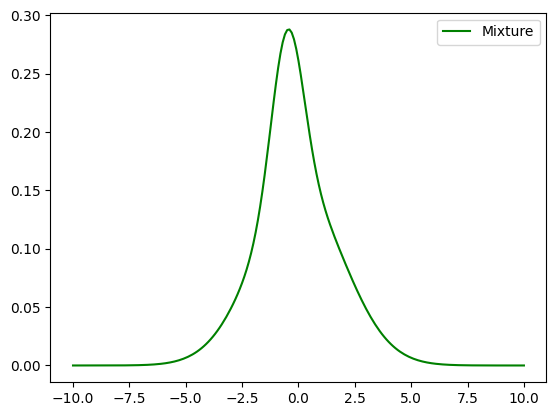

In [3]:
s = pd.Series(np.arange(-10,10.1,0.1))
s_norm_1 = normal_pdf(s, mu=-0.49, sigma=np.sqrt(0.49))
s_norm_2 = normal_pdf(s, mu=0, sigma=np.sqrt(4))
mixtured = 0.25 * s_norm_1 + 0.75 * s_norm_2
# plt.plot(s, s_norm_1, label='N(-0.49,0.49)', color='blue')
# plt.plot(s, s_norm_2, label='N(0,4)', color='red')
plt.plot(s, mixtured, label='Mixture', color='green')
# plt.axvline(x=1, color='r', linestyle='--')
plt.legend()

b) Observando la figura se nota que es asimétrica positiva, ya que tiene una cola izquierda con mayor densidad (se nota entre 1 y 2)

c)

In [4]:
w1 = 0.75
w2 = 0.25
mu1 = 0
mu2 = -0.49
var1 = 4
var2 = 0.49

#Media de la mixtura
mu_mix = w1 * mu1 + w2 * mu2

#Varianza de la mixtura
var_mix = w1 * (var1 + (mu1 - mu_mix) ** 2) + w2 * (var2 + (mu2 - mu_mix) ** 2)
std_mix = np.sqrt(var_mix)

#Tercer momento centrado
mu_3 = (
    w1 * ((mu1 - mu_mix) ** 3 + 3 * (mu1 - mu_mix) * var1)
    + w2 * ((mu2 - mu_mix) ** 3 + 3 * (mu2 - mu_mix) * var2))

#Cuarto momento centrado
mu_4 = (
    w1 * ((mu1 - mu_mix) ** 4 + 6 * (mu1 - mu_mix) ** 2 * var1 + 3 * var1 ** 2)
    + w2 * ((mu2 - mu_mix) ** 4 + 6 * (mu2 - mu_mix) ** 2 * var2 + 3 * var2 ** 2))

# Asimetría y kurtosis total (no en exceso)
skewness = mu_3 / (std_mix ** 3)
kurtosis_total = mu_4 / (var_mix ** 2)

print("Media:", mu_mix)
print("Varianza:", round(var_mix,5))
print("Tercer momento μ₃:", round(mu_3,5))
print("Cuarto momento μ₄:",   round(mu_4,5))
print("Asimetría:", round(skewness,5))
print("Kurtosis:", round(kurtosis_total,5))

Media: -0.1225
Varianza: 3.16752
Tercer momento μ₃: 0.95641
Cuarto momento μ₄: 36.55418
Asimetría: 0.16966
Kurtosis: 3.64333


d) Si, es leptocurtica ya que la kurtosis en exceso es 0.64. 

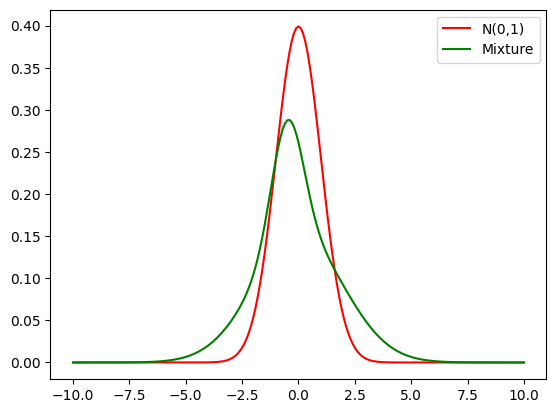

In [5]:
s = pd.Series(np.arange(-10,10.1,0.1))
norm_standar = normal_pdf(s, mu=0, sigma=1)
s_norm_1 = normal_pdf(s, mu=-0.49, sigma=np.sqrt(0.49))
s_norm_2 = normal_pdf(s, mu=0, sigma=np.sqrt(4))
mixtured = 0.25 * s_norm_1 + 0.75 * s_norm_2
plt.plot(s, norm_standar, label='N(0,1)', color='red')
plt.plot(s, mixtured, label='Mixture', color='green')
plt.legend()

e) leptocurtica con cola pesada a ambos lados

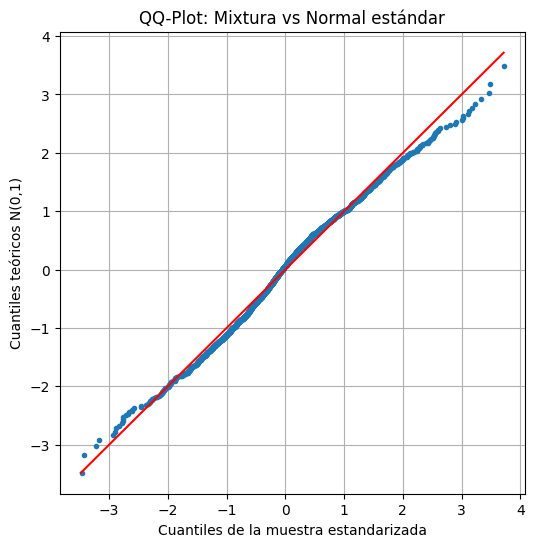

In [7]:
from scipy.stats import norm

# Generar muestra de 2000 valores
# Samplear de la mixtura es lo mismo que samplear de cada una de las normales que la componen pesando por su aporte a la mixtura.
u = np.random.rand(2000)
samples = np.where(u < w1,
                   np.random.normal(mu1, np.sqrt(var1), size=2000),
                   np.random.normal(mu2, np.sqrt(var2), size=2000)
                )

# Estandarizar la muestra
z = (samples - mu_mix) / var_mix**0.5

# Cuantiles teóricos de la normal estándar
probabilidades = (np.arange(1, 2001) - 0.5) / 2000
cuantiles_teoricos = norm.ppf(probabilidades)

# Ordenar la muestra estandarizada
z_ordenado = np.sort(z)

# QQ-Plot (eje horizontal: muestra estandarizada; eje vertical: teóricos)
plt.figure(figsize=(6, 6))
plt.plot(z_ordenado, cuantiles_teoricos, marker='.', linestyle='none')
xmin = min(z_ordenado.min(), cuantiles_teoricos.min())
xmax = max(z_ordenado.max(), cuantiles_teoricos.max())
plt.plot([xmin, xmax], [xmin, xmax], 'r-', label='Línea identidad')
plt.xlabel('Cuantiles de la muestra estandarizada')
plt.ylabel('Cuantiles teóricos N(0,1)')
plt.title('QQ-Plot: Mixtura vs Normal estándar')
plt.grid(True)
plt.show()

# 2)

In [12]:
df = pd.read_stata("MIA103_Final_Ejer_2_250823.dta")
df = df.set_index("t")
df.head()

,RBER_AR,RBER_AR_sd6
t,,
2010-01-01,98.870003,1.225477
2010-02-01,100.620003,1.976474
2010-03-01,99.820000,2.138749
2010-04-01,99.349998,1.786254
2010-05-01,102.059998,1.618118


a)

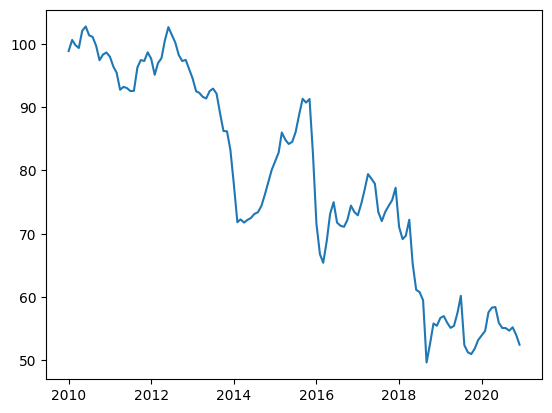

In [14]:
plt.plot(df['RBER_AR'])

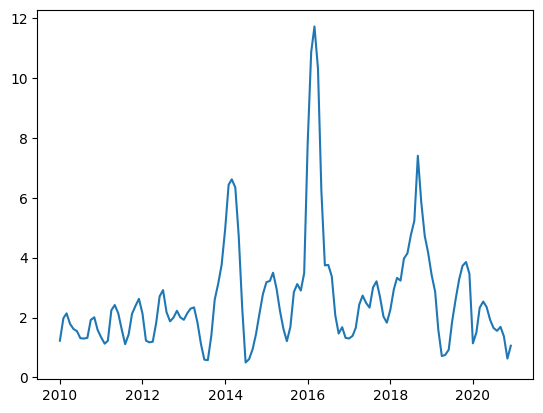

In [15]:
plt.plot(df['RBER_AR_sd6'])

b)

RBER_AR es I(0) con tendencia determinista, mientras que RBER_AR_sd6 es I(0).

In [16]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
# Con regression='ct'rechazo (evidencia de estacionariedad), así que le saco la tendencia

y = df['RBER_AR'].dropna()
adf = adfuller(y, regression='ct', autolag='AIC')  # autolag='t-stat' sería NG-Perron
print(adf[0], adf[1])  # estadístico, p-valor

-3.7043618301512495 0.022071616204801303


In [24]:
# Agrego un t
df['index'] = list(range(len(df)))

In [ ]:
# Calculo beta1
import statsmodels.api as sm

df_reg = df[['RBER_AR', 'index']].dropna()
X = df_reg[['index']]
y = df_reg['RBER_AR']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                RBER_AR   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     857.7
Date:                Tue, 26 Aug 2025   Prob (F-statistic):           4.27e-59
Time:                        20:46:09   Log-Likelihood:                -421.62
No. Observations:                 132   AIC:                             847.2
Df Residuals:                     130   BIC:                             853.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        104.5714      1.029    101.593      0.0

In [ ]:
# Resto tendencia determinista
beta1 = -0.3978
df['RBER_AR_detrended'] = df['RBER_AR'] - (model.params['index'] * df['index'])

-3.717333407835433 0.003875845856246455


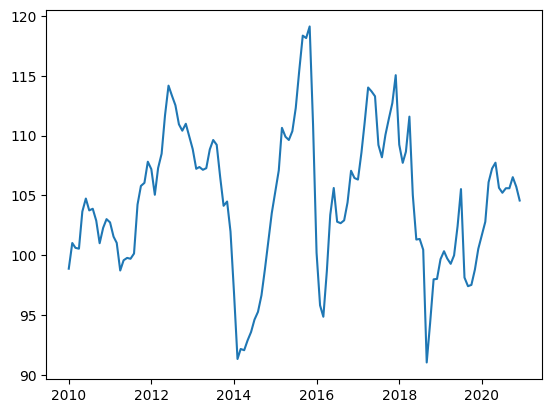

In [40]:
# Rechazo! Es I(0) con tendencia determinista
y = df['RBER_AR_detrended'].dropna()
adf = adfuller(y, regression='c', autolag='AIC')
print(adf[0], adf[1])

plt.plot(df['RBER_AR_detrended'])

In [ ]:
# Rechazo, es I(0)

y = df['RBER_AR_detrended'].dropna()
adf = adfuller(y, regression='c', autolag='AIC')  # autolag='t-stat' sería NG-Perron
print(adf[0], adf[1])  # estadístico, p-valor

-4.275830716114617 0.000489025626409123


c)

2. Hacemos un ajuste inicial sin especificar maxlags

In [41]:
from statsmodels.tsa.api import VAR

model = VAR(df[["RBER_AR_detrended", "RBER_AR_sd6"]].dropna())
result_var2 = model.fit()
print(result_var2.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 26, Aug, 2025
Time:                     20:57:13
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    1.56987
Nobs:                     131.000    HQIC:                   1.49169
Log likelihood:          -459.963    FPE:                    4.21310
AIC:                      1.43818    Det(Omega_mle):         4.02656
--------------------------------------------------------------------
Results for equation RBER_AR_detrended
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                       12.908558         4.324783            2.985           0.003
L1.RBER_AR_detrended         0.881437         0.039999           22.037           0.000
L1.RBER_AR_sd6      

/opt/homebrew/Caskroom/miniforge/base/envs/env-udesa/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


3. Usando el ajuste anterior, elejimos un maxlags apropiado con Selection Order Criteria.

In [ ]:
# Según todos los criterios, maxlags=2
print(model.select_order().summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        4.823       4.870       124.4       4.842
1        1.591       1.731       4.908       1.648
2      0.9621*      1.196*      2.617*      1.057*
3       0.9676       1.295       2.632       1.100
4        1.011       1.431       2.750       1.182
5        1.071       1.585       2.922       1.280
6        1.056       1.663       2.879       1.302
7        1.007       1.708       2.745       1.291
8        1.039       1.834       2.839       1.362
9        1.024       1.911       2.799       1.384
10       1.054       2.035       2.891       1.452
11       1.085       2.160       2.990       1.522
12       1.015       2.183       2.796       1.490
13       1.065       2.326       2.947       1.577
--------------------------------------------------


4. Segundo guess

## Ecuación 1: RBER_AR_detrended.
* Efectos propios (AR terms):
* L1 positivo y fuerte (1.25, muy significativo, p<0.001).
* L2 negativo (-0.39, muy significativo, p<0.001).
* Efectos cruzados: coeficientes muy pequeños y no significativos

## Ecuación 2: RBER_AR_sd6
* Efectos propios (sd6):
* L1: 1.33, muy significativo.
* L2: −0.52, muy significativo.

* Efectos cruzados
* L1: -0.064, significativo (p=0.019)
* L2: 0.082, significativo (p=0.002)

In [43]:
selected_lag = 2
result_var = model.fit(selected_lag)
print(result_var.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 26, Aug, 2025
Time:                     20:58:37
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    1.05145
Nobs:                     130.000    HQIC:                  0.920497
Log likelihood:          -412.930    FPE:                    2.29549
AIC:                     0.830868    Det(Omega_mle):         2.12860
--------------------------------------------------------------------
Results for equation RBER_AR_detrended
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                       14.711126         4.188148            3.513           0.000
L1.RBER_AR_detrended         1.247988         0.093690           13.320           0.000
L1.RBER_AR_sd6      

5. Satisfecho con el guess, evalúo la estabilidad del modelo (que no haya raices unitarias ni residuos autocorrelacionados)

In [44]:
print(f"El modelo VAR({selected_lag}) es estable: {result_var.is_stable()}.")

roots = result_var.roots
print(f"Raíces del VAR({selected_lag}):")
display(roots)

print(np.abs(result_var.roots))

if np.any(np.abs(roots) < 1):
    print(f"El modelo VAR({selected_lag}) NO es estable.")
else:
    print(f"El modelo VAR({selected_lag}) es estable.")

El modelo VAR(2) es estable: True.
Raíces del VAR(2):


array([1.5636567 +0.49715103j, 1.5636567 -0.49715103j,
       1.29322662+0.3903126j , 1.29322662-0.3903126j ])

[1.64078683 1.64078683 1.35084381 1.35084381]
El modelo VAR(2) es estable.


In [45]:
# H_0: residual autocorrelation up to lag x is zero
# NO rechazamos H0: los residuos no estan correlacionados :)
wb = result_var.test_whiteness(nlags=selected_lag+7)
print(wb)

<statsmodels.tsa.vector_ar.hypothesis_test_results.WhitenessTestResults object. H_0: residual autocorrelation up to lag 9 is zero: reject at 5% significance level. Test statistic: 49.086, critical value: 41.337>, p-value: 0.008>


In [46]:
p = result_var.k_ar
T = result_var.nobs

nlags = int(min(p + np.sqrt(T), T//5))
wb = result_var.test_whiteness(nlags=nlags)
print(wb)

<statsmodels.tsa.vector_ar.hypothesis_test_results.WhitenessTestResults object. H_0: residual autocorrelation up to lag 13 is zero: reject at 5% significance level. Test statistic: 62.191, critical value: 60.481>, p-value: 0.037>


In [48]:
#### Testeo por Causalidad en Sentido de Granger
# Ejemplo: infl causa en el sentio de Granger a crec_m?
# Paso 1: ajusta una regresión de crec_m en p rezagos de infl.
# Paso 2: hace un test-f (todos los betas son 0).
# Rechazamos H0: infl causa en el sentio de Granger a crec_m

print(result_var.test_causality("RBER_AR_detrended", ["RBER_AR_sd6"], kind="f"))
print(result_var.test_causality("RBER_AR_sd6", ["RBER_AR_detrended"], kind="f"))

<statsmodels.tsa.vector_ar.hypothesis_test_results.CausalityTestResults object. H_0: RBER_AR_sd6 does not Granger-cause RBER_AR_detrended: fail to reject at 5% significance level. Test statistic: 0.131, critical value: 3.032>, p-value: 0.877>
<statsmodels.tsa.vector_ar.hypothesis_test_results.CausalityTestResults object. H_0: RBER_AR_detrended does not Granger-cause RBER_AR_sd6: reject at 5% significance level. Test statistic: 5.094, critical value: 3.032>, p-value: 0.007>
